In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [4]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [4]:
data = pd.concat([df_train, df_test], axis=0)

In [5]:
df_train.shape

(1909, 16)

In [6]:
df_test.shape

(365, 15)

In [7]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]
    
    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



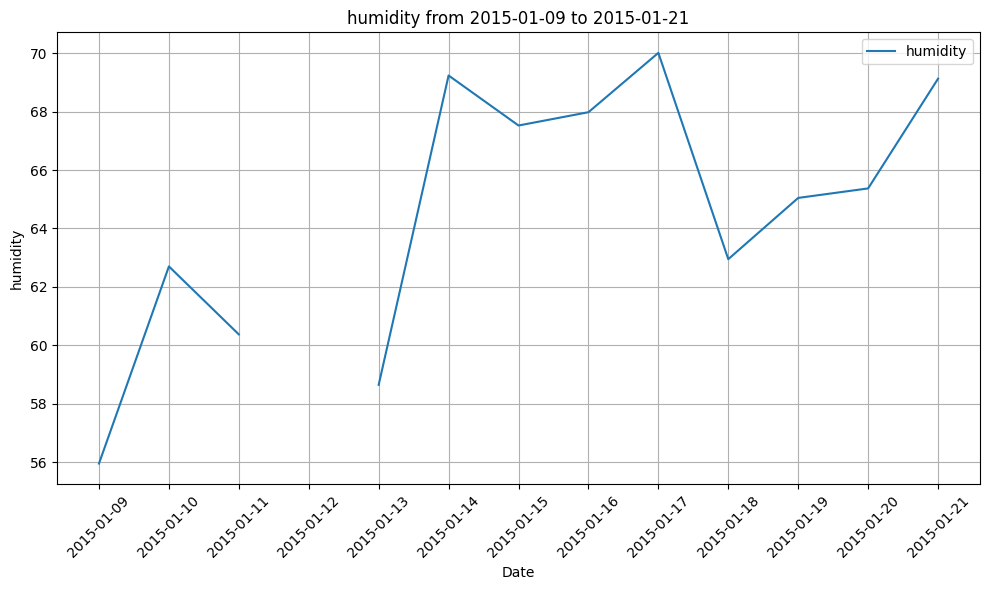

In [8]:
plot_feature_over_time(df_train, "humidity", "2015-01-09", "2015-01-21")

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [11]:
data['wind_speed']

0      27.74 km/h
1      21.78 km/h
2        6.83 m/s
3        5.79 m/s
4      25.14 km/h
          ...    
360    22.78 km/h
361    18.33 km/h
362      7.24 m/s
363      7.67 m/s
364    30.99 km/h
Name: wind_speed, Length: 2274, dtype: object

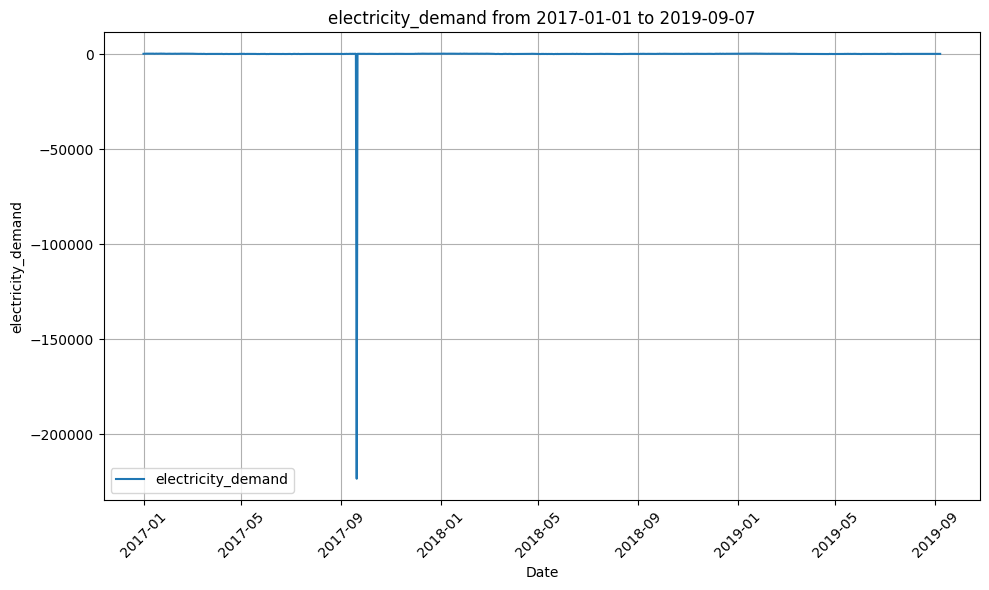

In [15]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2019-09-07')

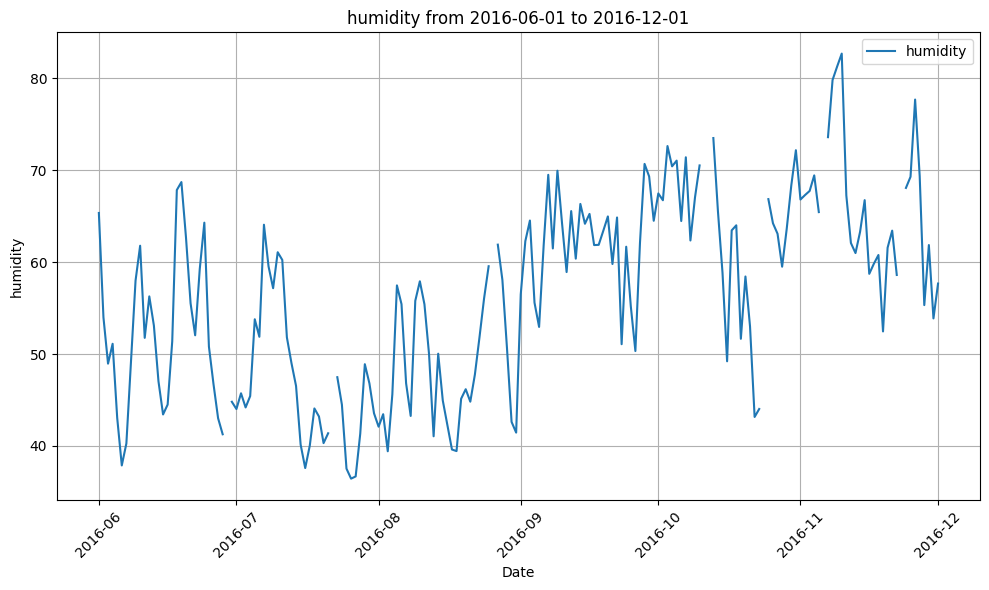

In [16]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

In [17]:
# Provide a complete data preprocessing transformations
df_train.isnull().sum().sort_values(ascending=False)


temperature_station10        316
temperature_station7         308
temperature_station3         289
temperature_station9         288
temperature_station1         285
temperature_station8         282
temperature_station5         279
temperature_station4         277
temperature_station2         275
temperature_station6         273
humidity                      96
wind_speed                    90
weather_condition             24
date                           0
oil_brent_price_indicator      0
electricity_demand             0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

for i in range(1,11):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    col_name = f"temperature_station{i}"
    values = df_train[col_name].to_numpy(copy=True).reshape(-1,1)
    imp.fit(values)
    imputed_col = imp.transform(values)
    df_train[col_name] = values

<class 'str'>
[[ 0.3694112 ]
 [ 2.00990312]
 [-2.60354361]
 ...
 [ 3.6881321 ]
 [        nan]
 [ 0.68548655]]
<class 'str'>
[[        nan]
 [        nan]
 [-2.42200127]
 ...
 [ 3.91947854]
 [ 0.70048376]
 [ 0.08099364]]
<class 'str'>
[[ 0.15997748]
 [ 1.61724241]
 [-3.68581932]
 ...
 [        nan]
 [        nan]
 [ 2.33183371]]
<class 'str'>
[[ 0.11822384]
 [        nan]
 [-2.39235425]
 ...
 [ 4.0717165 ]
 [-0.40744041]
 [ 1.09302286]]
<class 'str'>
[[-0.4444552 ]
 [ 2.16006253]
 [-1.93670412]
 ...
 [ 4.36534655]
 [-0.58091683]
 [ 0.75516156]]
<class 'str'>
[[ 0.31367476]
 [ 2.5156272 ]
 [-2.95033176]
 ...
 [ 3.58035795]
 [-0.4447298 ]
 [ 0.97107632]]
<class 'str'>
[[ 0.10619201]
 [ 1.86747389]
 [-3.07482793]
 ...
 [ 3.4042918 ]
 [ 0.0342287 ]
 [ 0.41248499]]
<class 'str'>
[[ 0.36943007]
 [ 1.95316464]
 [-2.69865013]
 ...
 [ 4.17346115]
 [ 0.0211989 ]
 [ 0.16963814]]
<class 'str'>
[[ 1.27946962]
 [ 1.87823255]
 [-2.35486039]
 ...
 [ 3.75562522]
 [-0.86465719]
 [ 0.33950264]]
<class 'st

In [22]:
values

array([[-0.38466135],
       [ 1.58236487],
       [-2.77088255],
       ...,
       [ 4.07033257],
       [        nan],
       [-0.1556837 ]], shape=(1909, 1))

In [21]:
df_train.isnull().sum().sort_values(ascending=False)

temperature_station10        316
temperature_station7         308
temperature_station3         289
temperature_station9         288
temperature_station1         285
temperature_station8         282
temperature_station5         279
temperature_station4         277
temperature_station2         275
temperature_station6         273
humidity                      96
wind_speed                    90
weather_condition             24
date                           0
oil_brent_price_indicator      0
electricity_demand             0
dtype: int64

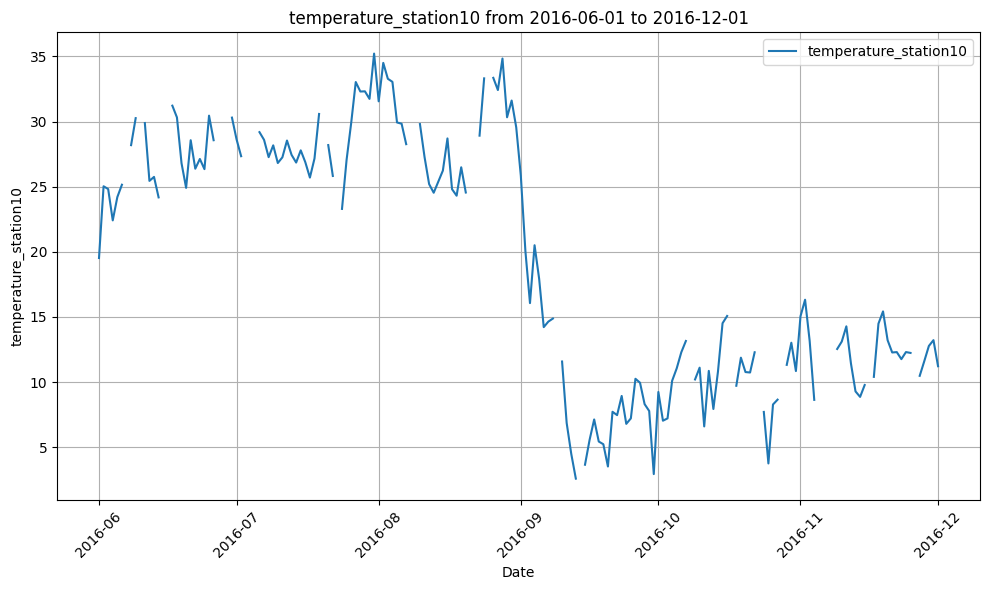

In [ ]:
plot_feature_over_time(data, 'temperature_station10', '2016-06-01', '2016-12-01')

In [ ]:
# imputation 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_train["temperature_station10"].to_numpy().reshape(-1,1))

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
imputed = imp.transform(df_train["temperature_station10"].to_numpy().reshape(-1,1))

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)


temperature_station7         308
temperature_station3         289
temperature_station9         288
temperature_station1         285
temperature_station8         282
temperature_station5         279
temperature_station4         277
temperature_station2         275
temperature_station6         273
humidity                      96
wind_speed                    90
weather_condition             24
date                           0
oil_brent_price_indicator      0
temperature_station10          0
electricity_demand             0
dtype: int64

In [ ]:
df_train["temperature_station10"] = imputed

In [ ]:
df_train["temperature_station10"].notnull().sum()


np.int64(1909)

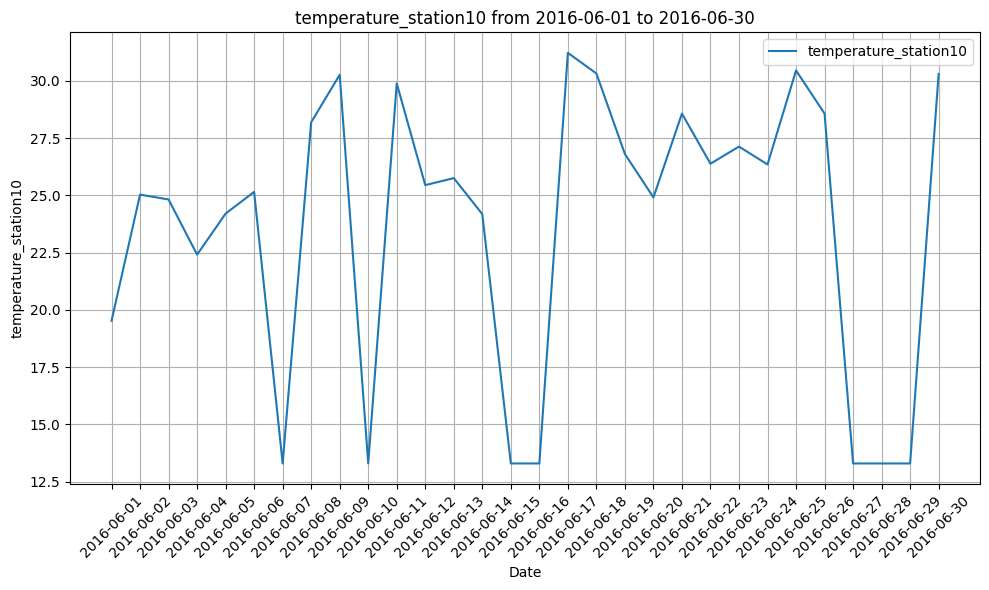

In [ ]:
plot_feature_over_time(df_train, 'temperature_station10', '2016-06-01', '2016-06-30')

In [ ]:
df_train["temperature_station10"].to_numpy().reshape(-1,1)

array([[-0.38466135],
       [ 1.58236487],
       [-2.77088255],
       ...,
       [ 4.07033257],
       [        nan],
       [-0.1556837 ]], shape=(1909, 1))

In [ ]:
# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        X_train_no_duplicates = X_train.copy()
        y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
        return X_train_no_duplicates, y_train_no_duplicates, X_val.copy()

# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train = X_train.fillna(-1)
        X_val = X_val.fillna(-1)
        return X_train.copy(), X_val.copy()
    else:
        X_train = X_train.fillna(-1)
        return X_train

# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), X_val.copy()
    else:
        return X_train.copy()

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = ['humidity', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10']
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [ ]:
def evaluate_pipeline(X, y, n_splits=5):

    ### call transformations here, if there is no learning and no need to be crossval
    X, y = handle_inconsistencies(X, y)
    # X, y = handle_duplicates(X, y)
    X  = handle_missing_values(X, y)
    # X_train = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    # X, y = feature_engineering(XX, y)
    X = feature_selection(X, y)
    
    model = LinearRegression()
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    train_scores = []
    val_scores = []
    
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")
        
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        ### call transformations here, if there is learning
        # X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        X_train, y_train, X_val = handle_duplicates(X_train, y_train, X_val)
        # X_train, X_val = handle_missing_values(X_train, y_train, X_val)
        X_train, X_val = handle_categorical(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        X_train, y_train, X_val = feature_engineering(X_train, y_train, X_val)
        # X_train, X_val = feature_selection(X_train, y_train, X_val)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)
        
        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")
    
    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)
    
    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)
    
    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")
    
    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")
    
    return mean_val_mse  # Return mean validation MSE as the overall score

In [ ]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 1198.2910, Validation MSE: 1591.4458
Processing fold 2/5...
Fold 2 Train MSE: 1364.6326, Validation MSE: 1376.3577
Processing fold 3/5...
Fold 3 Train MSE: 1318.7249, Validation MSE: 157358182.6667
Processing fold 4/5...
Fold 4 Train MSE: 39175684.8609, Validation MSE: 99701.3186
Processing fold 5/5...
Fold 5 Train MSE: 31360575.8434, Validation MSE: 44368.0790

Train MSE:
Mean: 14108028.4706, Max: 39175684.8609, Min: 1198.2910

Validation MSE:
Mean: 31501043.9736, Max: 157358182.6667, Min: 1376.3577


31501043.97358788

### Generating Submission File

In [ ]:
# Train and submit your results

In [ ]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [ ]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = LinearRegression()
    
    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test = feature_selection(X_train, y_train, X_test)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)
    
    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)
    
    return y_test_pred

In [ ]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

Training model on entire dataset of shape: (1909, 11)
Predicting on test dataset of shape: (365, 11)


In [ ]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date']
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
